# Makine Öğrenmesi ile Maaş Tahmini

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
import missingno as msno
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

## Veri Ön İşleme

### Genel Resim

In [5]:
df = pd.read_csv('hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [6]:
df.shape

(322, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [8]:
percents = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]
df.describe(percentiles=percents).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
AtBat,322.000,380.929,153.405,16.000,20.420,161.000,194.100,255.250,379.500,512.000,584.900,658.590,687.000
Hits,322.000,101.025,46.455,1.000,4.420,39.000,45.100,64.000,96.000,137.000,163.000,210.790,238.000
HmRun,322.000,10.770,8.709,0.000,0.000,0.000,1.000,4.000,8.000,16.000,24.000,33.000,40.000
Runs,322.000,50.910,26.024,0.000,1.210,17.000,20.100,30.250,48.000,69.000,89.000,107.790,130.000
RBI,322.000,48.028,26.167,0.000,2.000,14.000,19.000,28.000,44.000,64.750,86.000,112.370,121.000
Walks,322.000,38.742,21.639,0.000,1.000,11.050,15.000,22.000,35.000,53.000,69.900,93.580,105.000
Years,322.000,7.444,4.926,1.000,1.000,1.000,2.000,4.000,6.000,11.000,15.000,19.790,24.000
CAtBat,322.000,2648.683,2324.206,19.000,41.000,216.500,342.200,816.750,1928.000,3924.250,6123.400,8749.970,14053.000
CHits,322.000,717.571,654.473,4.000,9.840,54.000,86.000,209.000,508.000,1059.250,1659.600,2500.340,4256.000
CHmRun,322.000,69.491,86.266,0.000,0.000,2.000,4.000,14.000,37.500,90.000,194.900,373.120,548.000


In [9]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

### Kategorik Değişken Analizi

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "Salary"]

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [12]:
cat_cols

['League', 'Division', 'NewLeague']

In [13]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [14]:
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

        League  Ratio
League               
A          175 54.348
N          147 45.652
##########################################


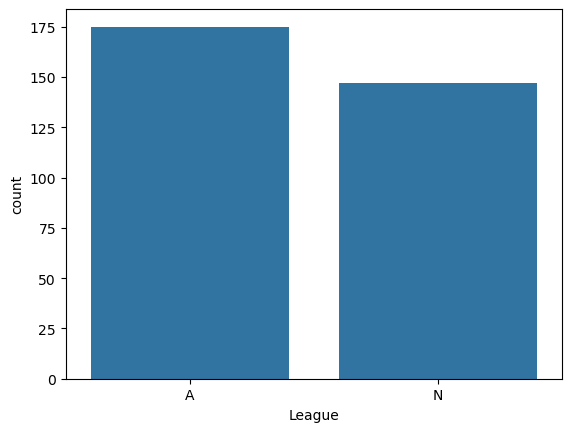

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
##########################################


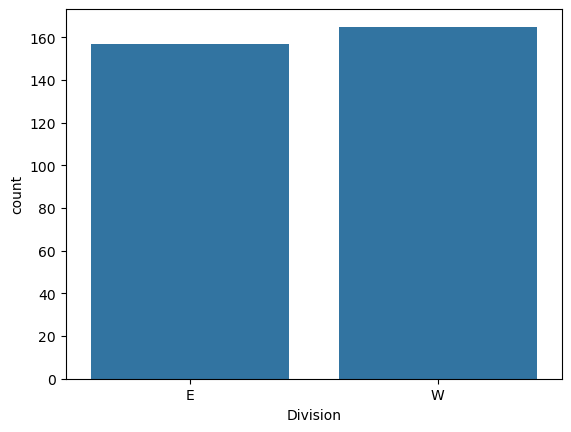

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
##########################################


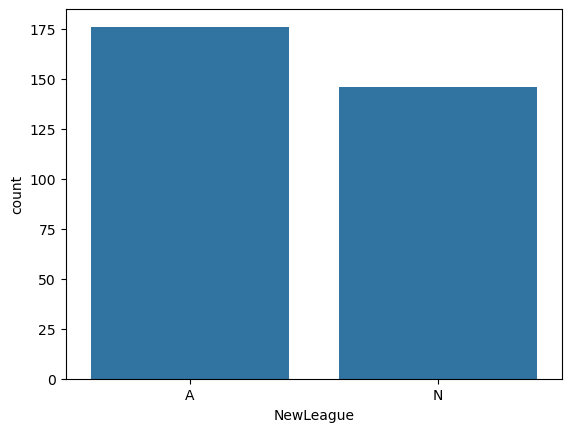

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

### Sayısal Değişken Analizi

In [17]:
df.describe(percentiles=percents).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
AtBat,322.000,380.929,153.405,16.000,20.420,161.000,194.100,255.250,379.500,512.000,584.900,658.590,687.000
Hits,322.000,101.025,46.455,1.000,4.420,39.000,45.100,64.000,96.000,137.000,163.000,210.790,238.000
HmRun,322.000,10.770,8.709,0.000,0.000,0.000,1.000,4.000,8.000,16.000,24.000,33.000,40.000
Runs,322.000,50.910,26.024,0.000,1.210,17.000,20.100,30.250,48.000,69.000,89.000,107.790,130.000
RBI,322.000,48.028,26.167,0.000,2.000,14.000,19.000,28.000,44.000,64.750,86.000,112.370,121.000
Walks,322.000,38.742,21.639,0.000,1.000,11.050,15.000,22.000,35.000,53.000,69.900,93.580,105.000
Years,322.000,7.444,4.926,1.000,1.000,1.000,2.000,4.000,6.000,11.000,15.000,19.790,24.000
CAtBat,322.000,2648.683,2324.206,19.000,41.000,216.500,342.200,816.750,1928.000,3924.250,6123.400,8749.970,14053.000
CHits,322.000,717.571,654.473,4.000,9.840,54.000,86.000,209.000,508.000,1059.250,1659.600,2500.340,4256.000
CHmRun,322.000,69.491,86.266,0.000,0.000,2.000,4.000,14.000,37.500,90.000,194.900,373.120,548.000


### Hedef Değişken Analizi

In [19]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [20]:
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




In [21]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [22]:
for col in num_cols:
    target_summary_with_num(df, "Salary", col)

           AtBat
Salary          
67.500   181.000
68.000   209.000
70.000   248.600
75.000   236.400
80.000   399.000
86.500   181.000
87.500   445.000
90.000   321.833
91.500   321.000
95.000   151.000
97.500   382.000
100.000  384.167
105.000  487.000
110.000  323.000
115.000  426.000
120.000  309.500
125.000  328.000
130.000  309.000
135.000  294.000
137.000  258.000
140.000  352.000
145.000  424.500
150.000  423.000
155.000  456.000
160.000  589.000
165.000  596.500
172.000  540.000
175.000  346.000
180.000  217.000
185.000  520.000
190.000  181.000
191.000  275.000
195.000  453.000
200.000  516.000
202.500  431.000
210.000  463.500
215.000  485.333
225.000  249.500
230.000  236.000
235.000  213.000
240.000  242.000
245.000  193.000
247.500  205.000
250.000  339.833
260.000  155.000
265.000  199.000
275.000  218.000
277.500  408.000
286.667  205.000
297.500  220.000
300.000  344.800
305.000  254.000
320.000  311.000
325.000  333.000
326.667  368.000
340.000  244.000
341.667  284.5

### Eksik Veri Analizi

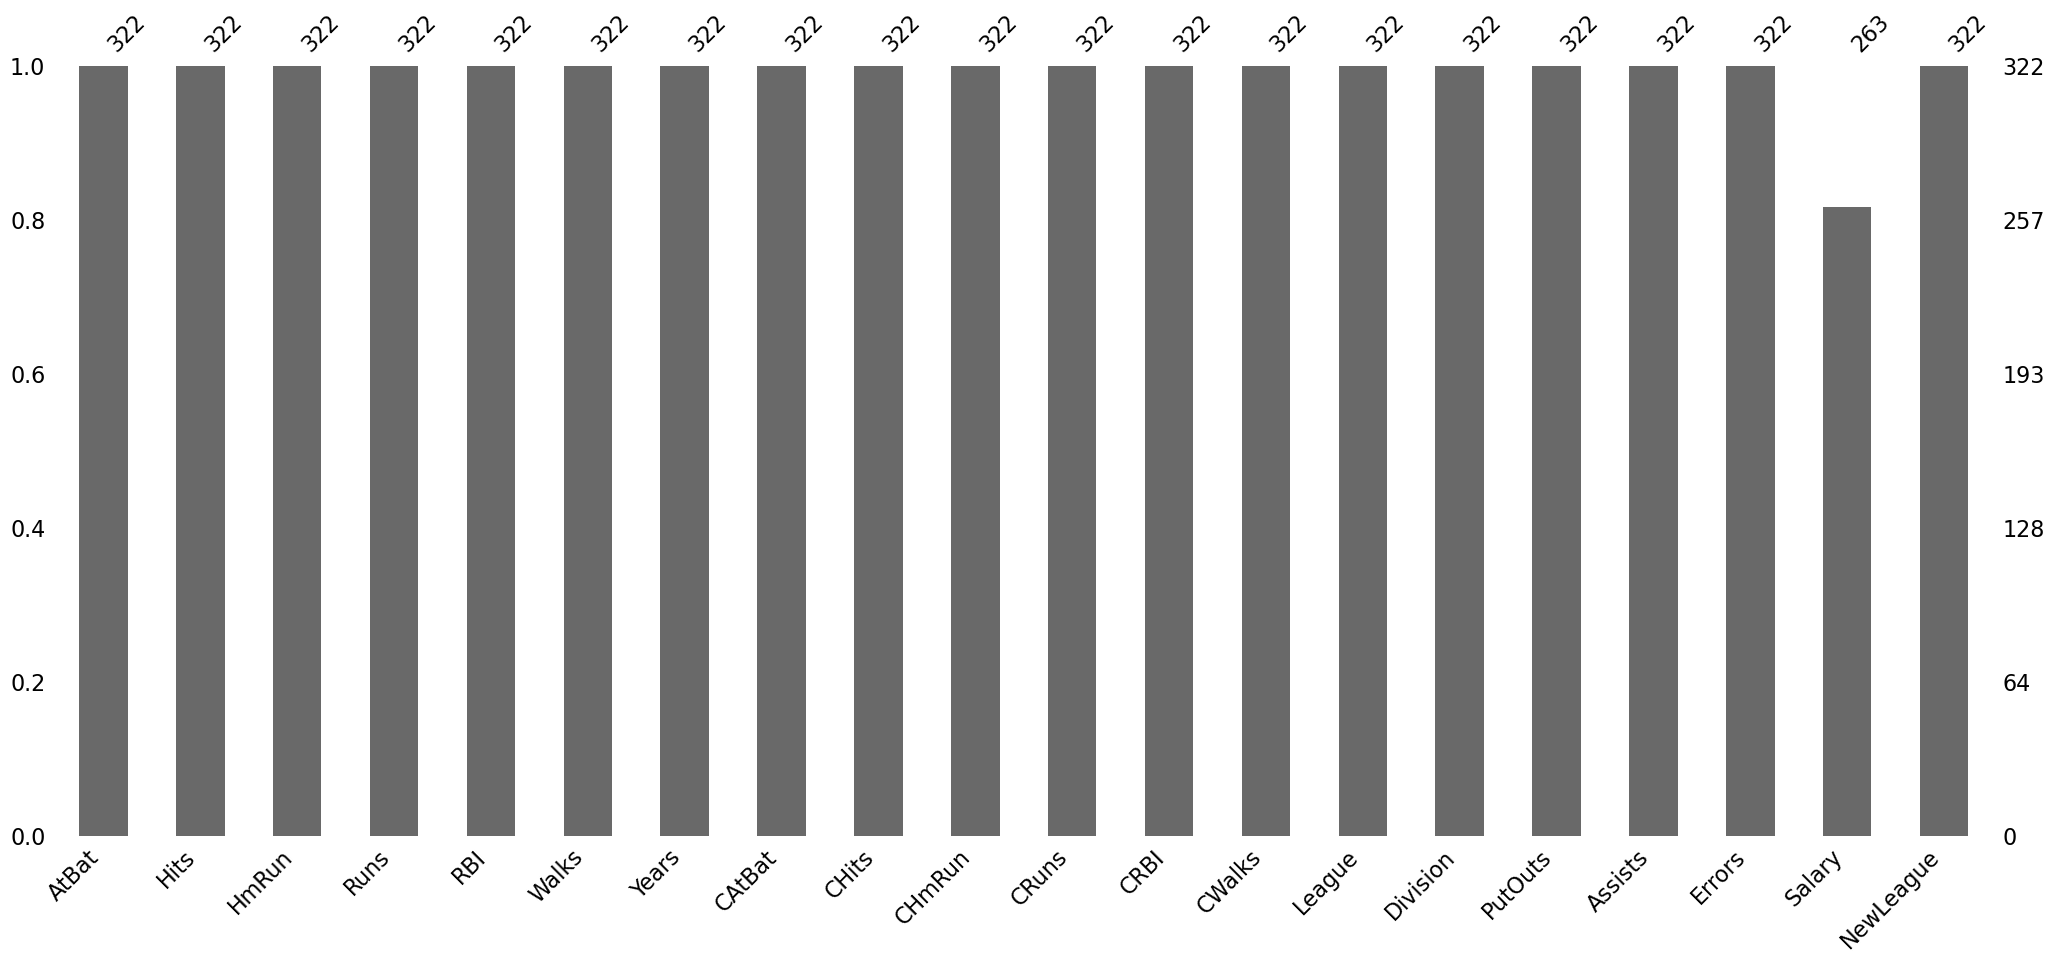

In [24]:
msno.bar(df)
plt.show()

### Korelasyon Analizi

In [26]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AtBat    322 non-null    int64
 1   Hits     322 non-null    int64
 2   HmRun    322 non-null    int64
 3   Runs     322 non-null    int64
 4   RBI      322 non-null    int64
 5   Walks    322 non-null    int64
 6   Years    322 non-null    int64
 7   CAtBat   322 non-null    int64
 8   CHits    322 non-null    int64
 9   CHmRun   322 non-null    int64
 10  CRuns    322 non-null    int64
 11  CRBI     322 non-null    int64
 12  CWalks   322 non-null    int64
 13  PutOuts  322 non-null    int64
 14  Assists  322 non-null    int64
 15  Errors   322 non-null    int64
dtypes: int64(16)
memory usage: 40.4 KB


In [27]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.95):
    numeric_df = dataframe.select_dtypes(include=[float, int])

    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    
    return drop_list

high_correlated_cols(df, plot=False)

['Hits', 'CHits', 'CRuns']

## Feature Engineering

### Aykırı Değer Analizi

In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [31]:
for col in num_cols:
    print("******" , col , "******")
    print(check_outlier(df, col))
    print("***********************")

****** AtBat ******
False
***********************
****** Hits ******
False
***********************
****** HmRun ******
True
***********************
****** Runs ******
True
***********************
****** RBI ******
True
***********************
****** Walks ******
True
***********************
****** Years ******
True
***********************
****** CAtBat ******
True
***********************
****** CHits ******
True
***********************
****** CHmRun ******
True
***********************
****** CRuns ******
True
***********************
****** CRBI ******
True
***********************
****** CWalks ******
True
***********************
****** PutOuts ******
True
***********************
****** Assists ******
True
***********************
****** Errors ******
True
***********************


In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe[variable] = dataframe[variable].astype(float)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in num_cols:
    replace_with_thresholds(df, col)


### Eksik Veri Analizi

In [34]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [35]:
dff = pd.get_dummies(df, drop_first=True)

dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,NaN,False,False,False
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,True,True,True
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,False,True,False
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,True,False,True
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,True,False,True


In [36]:
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,NaN,0.000,-1.000,0.000
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,0.089,1.000,0.000,1.000
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000,0.098,0.000,0.000,0.000
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375,0.134,1.000,-1.000,1.000
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250,-0.596,1.000,-1.000,1.000


In [37]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,-0.611,0.000,-1.000,0.000
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,0.089,1.000,0.000,1.000
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000,0.098,0.000,0.000,0.000
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375,0.134,1.000,-1.000,1.000
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250,-0.596,1.000,-1.000,1.000


In [38]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

df["Salary_imputed_knn"] = dff[["Salary"]]

df.loc[df["Salary"].isnull(), ["Salary", "Salary_imputed_knn"]]

,Salary,Salary_imputed_knn
0,NaN,82.900
15,NaN,87.600
18,NaN,692.000
22,NaN,310.400
30,NaN,642.000
32,NaN,1245.447
36,NaN,310.000
38,NaN,612.000
39,NaN,131.300
41,NaN,509.000


In [39]:
df["Salary"] = df["Salary_imputed_knn"]
df.drop(columns=[col for col in df.columns if col.endswith('_imputed_knn')], inplace=True)

In [40]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

### Feature Extraction

In [42]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20.000,82.900,A
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,648.625,82.000,14.000,480.000,A
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,648.625,40.000,4.000,91.500,N


In [43]:
df['NEW_Errors/Hits'] = df['Errors'] / df['Hits']
df['NEW_CHits/Hits'] = df['CHits'] / df['Hits']
df['NEW_CHits/Years'] = df['CHits'] / df['Years']
df['NEW_Runs/AtBat'] = df['Runs'] / df['AtBat']
df['NEW_CRuns/CAtBat'] = df['CRuns'] / df['CAtBat']
df['NEW_HmRun/Runs'] = df.apply(lambda row: row['HmRun'] / row['Runs'] if row['Runs'] != 0 else 0, axis=1)
df['NEW_CHmRun/CRuns'] = df['CHmRun'] / df['CRuns']
df['NEW_CRuns/Years'] = df['CRuns'] / df['Years']
df["NEW_Runs/CRuns"] = df["Runs"] / df["CRuns"]
df['NEW_Runs_Increase'] = df['Runs'] / df['NEW_CRuns/Years']
df["NEW_ULTIMATE_POWER"] = (df["CHits"] + df["CHmRun"] + df["CRuns"]) / 3

In [44]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_Errors/Hits,NEW_CHits/Hits,NEW_CHits/Years,NEW_Runs/AtBat,NEW_CRuns/CAtBat,NEW_HmRun/Runs,NEW_CHmRun/CRuns,NEW_CRuns/Years,NEW_Runs/CRuns,NEW_Runs_Increase,NEW_ULTIMATE_POWER
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20.000,82.900,A,0.303,1.000,66.000,0.102,0.102,0.033,0.033,30.000,1.000,1.000,32.333
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N,0.123,10.309,59.643,0.076,0.093,0.292,0.215,22.929,0.075,1.047,408.333
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,648.625,82.000,14.000,480.000,A,0.108,3.515,152.333,0.138,0.138,0.273,0.281,74.667,0.295,0.884,248.000
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N,0.021,11.170,143.182,0.131,0.147,0.308,0.246,75.273,0.079,0.864,869.000
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,648.625,40.000,4.000,91.500,N,0.046,1.161,50.500,0.121,0.121,0.256,0.250,24.000,0.812,1.625,53.667


In [45]:
df.isnull().sum()

AtBat                 0
Hits                  0
HmRun                 0
Runs                  0
RBI                   0
Walks                 0
Years                 0
CAtBat                0
CHits                 0
CHmRun                0
CRuns                 0
CRBI                  0
CWalks                0
League                0
Division              0
PutOuts               0
Assists               0
Errors                0
Salary                0
NewLeague             0
NEW_Errors/Hits       0
NEW_CHits/Hits        0
NEW_CHits/Years       0
NEW_Runs/AtBat        0
NEW_CRuns/CAtBat      0
NEW_HmRun/Runs        0
NEW_CHmRun/CRuns      0
NEW_CRuns/Years       0
NEW_Runs/CRuns        0
NEW_Runs_Increase     0
NEW_ULTIMATE_POWER    0
dtype: int64

### Encoding

In [47]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Errors/Hits,NEW_CHits/Hits,NEW_CHits/Years,NEW_Runs/AtBat,NEW_CRuns/CAtBat,NEW_HmRun/Runs,NEW_CHmRun/CRuns,NEW_CRuns/Years,NEW_Runs/CRuns,NEW_Runs_Increase,NEW_ULTIMATE_POWER,League_N,Division_W,NewLeague_N
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,82.900,0.303,1.000,66.000,0.102,0.102,0.033,0.033,30.000,1.000,1.000,32.333,False,False,False
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,0.123,10.309,59.643,0.076,0.093,0.292,0.215,22.929,0.075,1.047,408.333,True,True,True
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,0.108,3.515,152.333,0.138,0.138,0.273,0.281,74.667,0.295,0.884,248.000,False,True,False
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,0.021,11.170,143.182,0.131,0.147,0.308,0.246,75.273,0.079,0.864,869.000,True,False,True
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,0.046,1.161,50.500,0.121,0.121,0.256,0.250,24.000,0.812,1.625,53.667,True,False,True


### Scaling

In [49]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250


### Korelasyon Analizi

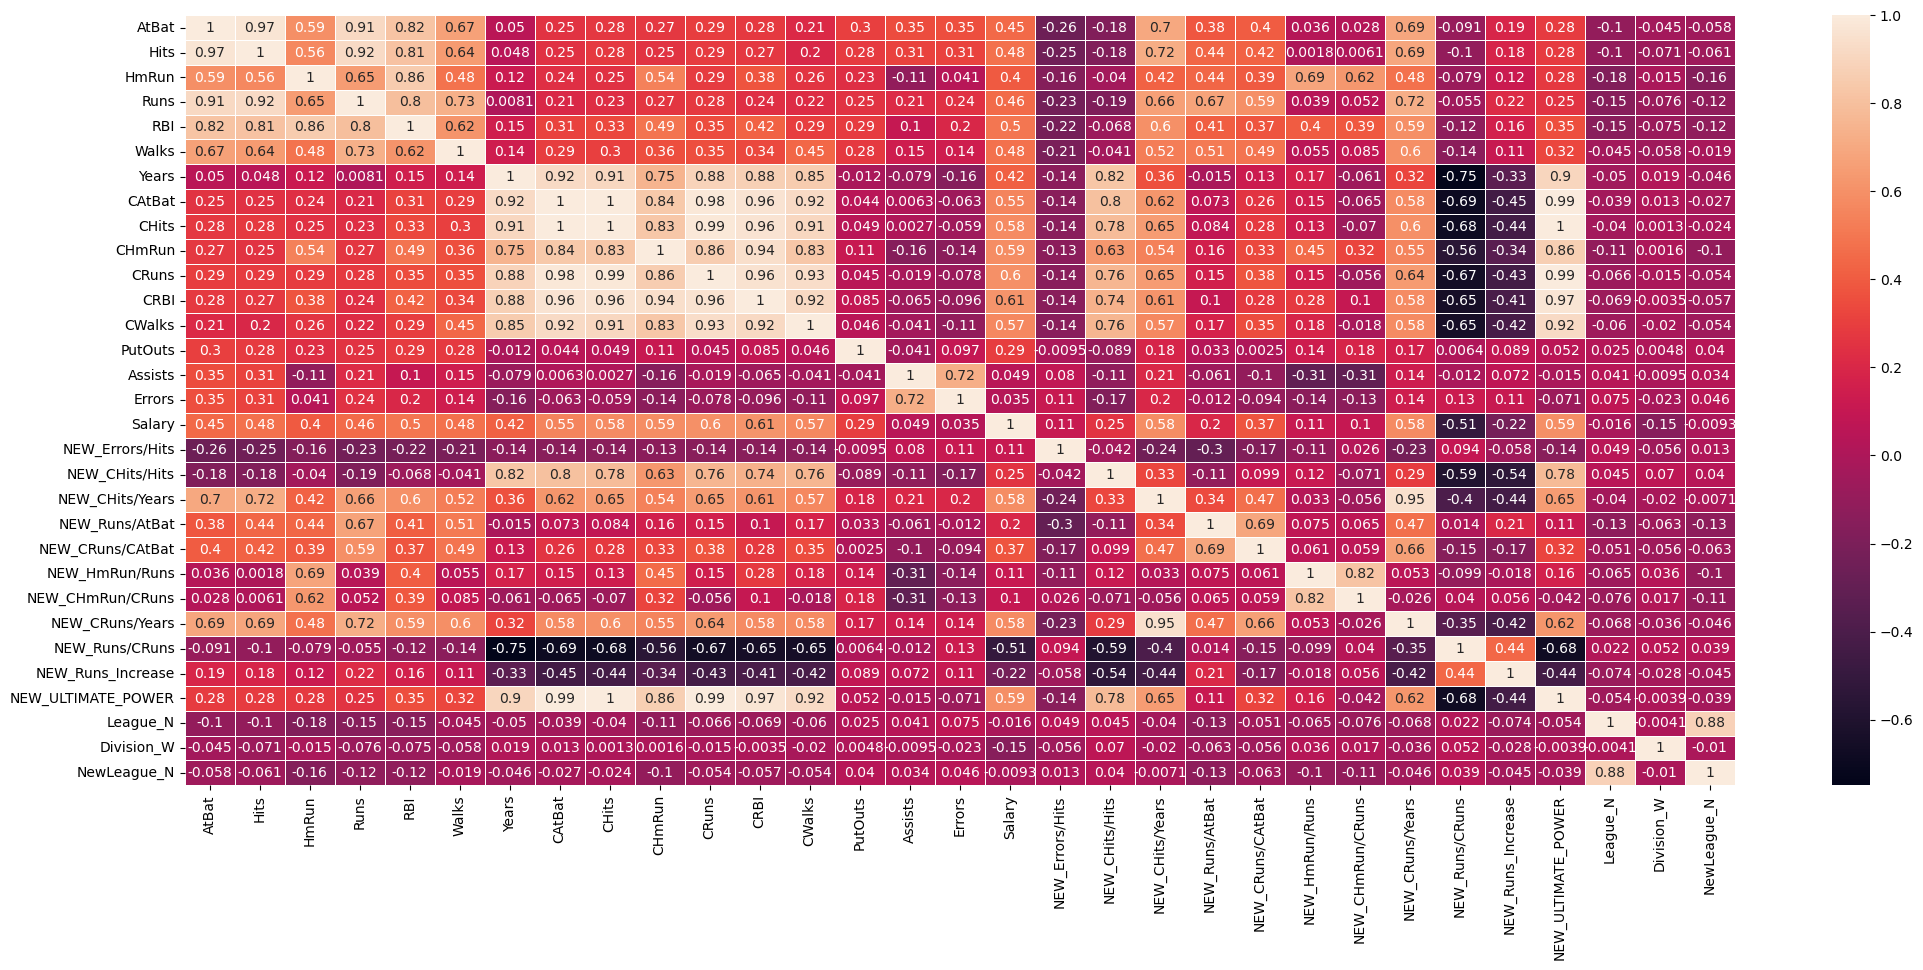

In [51]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AtBat               322 non-null    float64
 1   Hits                322 non-null    float64
 2   HmRun               322 non-null    float64
 3   Runs                322 non-null    float64
 4   RBI                 322 non-null    float64
 5   Walks               322 non-null    float64
 6   Years               322 non-null    float64
 7   CAtBat              322 non-null    float64
 8   CHits               322 non-null    float64
 9   CHmRun              322 non-null    float64
 10  CRuns               322 non-null    float64
 11  CRBI                322 non-null    float64
 12  CWalks              322 non-null    float64
 13  PutOuts             322 non-null    float64
 14  Assists             322 non-null    float64
 15  Errors              322 non-null    float64
 16  Salary  

## Modelleme

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Errors/Hits,NEW_CHits/Hits,NEW_CHits/Years,NEW_Runs/AtBat,NEW_CRuns/CAtBat,NEW_HmRun/Runs,NEW_CHmRun/CRuns,NEW_CRuns/Years,NEW_Runs/CRuns,NEW_Runs_Increase,NEW_ULTIMATE_POWER,League_N,Division_W,NewLeague_N
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,82.900,0.303,1.000,66.000,0.102,0.102,0.033,0.033,30.000,1.000,1.000,32.333,False,False,False
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,475.000,0.123,10.309,59.643,0.076,0.093,0.292,0.215,22.929,0.075,1.047,408.333,True,True,True
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,2.024,0.267,1.000,480.000,0.108,3.515,152.333,0.138,0.138,0.273,0.281,74.667,0.295,0.884,248.000,False,True,False
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.191,1.364,1.830,0.675,-0.056,-0.179,-0.375,500.000,0.021,11.170,143.182,0.131,0.147,0.308,0.246,75.273,0.079,0.864,869.000,True,False,True
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.024,0.003,-0.250,91.500,0.046,1.161,50.500,0.121,0.121,0.256,0.250,24.000,0.812,1.625,53.667,True,False,True


### Linear Regression

In [56]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=46)


linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

In [57]:
y_pred = model.predict(X_train)
lin_train_rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print("LINEAR REGRESSION TRAIN RMSE:", "{:,.2f}".format(lin_train_rmse))

LINEAR REGRESSION TRAIN RMSE: 239.19


In [58]:
lin_train_r2 = linreg.score(X_train,y_train)
print("LINEAR REGRESSION TRAIN R-SQUARED:", "{:,.3f}".format(lin_train_r2))

LINEAR REGRESSION TRAIN R-SQUARED: 0.707


In [59]:
y_pred = model.predict(X_test)
lin_test_rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print("LINEAR REGRESSION TEST RMSE:", "{:,.2f}".format(lin_test_rmse))

LINEAR REGRESSION TEST RMSE: 223.61


In [60]:
lin_test_r2 = linreg.score(X_test,y_test)
print("LINEAR REGRESSION TEST R-SQUARED:", "{:,.3f}".format(lin_test_r2))

LINEAR REGRESSION TEST R-SQUARED: 0.688


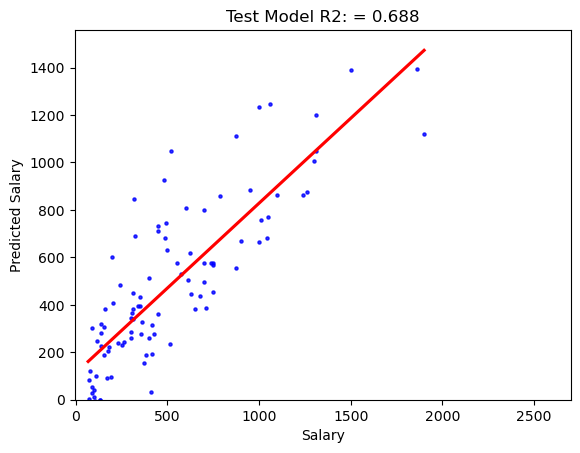

In [61]:
# Test part regplot:

g = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'b', 's': 5},
                ci=False, color="r")
g.set_title(f"Test Model R2: = {lin_test_r2:.3f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-5, 2700)
plt.ylim(bottom=0)
plt.show()

In [62]:
print("LINEAR REGRESSION CROSS_VAL_SCORE:", "{:,.3f}".format(np.mean(np.sqrt(-cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))))

LINEAR REGRESSION CROSS_VAL_SCORE: 267.332


### Random Forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)


rf_model = RandomForestRegressor().fit(X_train, y_train)

# Train Error
y_pred = rf_model.predict(X_train)

# Test Error
y_pred1= rf_model.predict(X_test)

rf_train_rmse =np.sqrt(mean_squared_error(y_train, y_pred))
rf_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred1))
rf_train_r2 = r2_score(y_train, y_pred)
rf_test_r2 = r2_score(y_test, y_pred1)

print("RF Train RMSE:", "{:,.2f}".format(rf_train_rmse))
print("RF Test RMSE:", "{:,.2f}".format(rf_test_rmse),"\n")
print("RF Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred)))
print("RF Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred1)), "\n")
print("RF Train R^2:", "{:,.2f}".format(rf_train_r2))
print("RF Test R^2:", "{:,.2f}".format(rf_test_r2))

RF Train RMSE: 94.58
RF Test RMSE: 274.33 

RF Train MAE: 57.23
RF Test MAE: 162.34 

RF Train R^2: 0.95
RF Test R^2: 0.67


In [65]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 15],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 8]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': None,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [66]:
# RF TUNED
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

rf_tuned_test_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_test_r2 = r2_score(y_test, y_pred)

print("RF_TUNED Test RMSE:", "{:,.2f}".format(rf_tuned_test_rmse),"\n")
print("RF_TUNED Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
print("RF_TUNED Test R^2:", "{:,.2f}".format(rf_tuned_test_r2))

RF_TUNED Test RMSE: 284.17 

RF_TUNED Test MAE: 165.14 

RF_TUNED Test R^2: 0.65


### Feature Importance

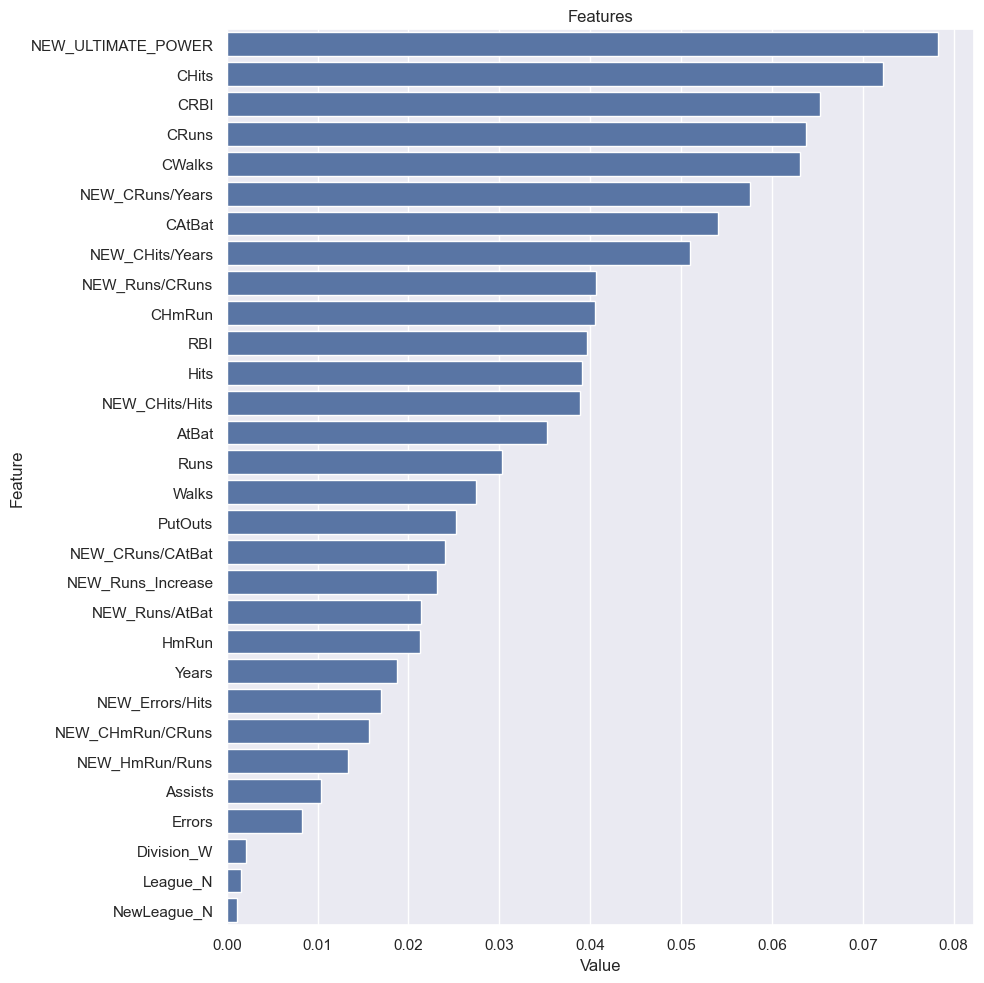

In [68]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_tuned, X_test)